# Results

This notebook generates the plots for the rest of my experiments (see config.yml for details). The data is obtained by running the modified [ANN-Benchmarks](https://github.com/binidxaba/ann-benchmarks).

The relevant csv files are:
- create.csv: The result of grepping the index build start/end tags and convert to unix timestamps
- results.csv: The file generated by the benchmark after executing the data_export.py script

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

## Data directory

You can find the data files in the following directories in the repository. Un-comment the one that you want to explore.

In [3]:
#directories = ["csv_sift_128_euclidean_parallel_full_1702552253", "csv_gist_960_parallel_full_1702552133", "csv_glove_200_1702404986"]
directories = ["csv_sift_128_euclidean_parallel_full_1705330369", "csv_gist_960_parallel_full_1705330656","csv_glove_parallel_full_200_1705331245"]
datasets = ["sift", "gist", "glove"]
img_prefixes=[10,20,30]

In [4]:
ix = 2
directory = directories[ix]
img_prefix = img_prefixes[ix]
dataset = datasets[ix]
img_dir="./tmp"

In [5]:
colors = ["#412e93", "#f9457a", "#da38ca"]
ef_construction = 200

## Build Time

I parsed the ann-benchmarks output looking for the Index Build start/end tags, then converted those to Unix timestamps.

In [6]:
build_time = pd.read_csv(directory + "/create.csv")
build_time = build_time.rename(columns={'extension': 'Extension'})
build_time['build_time'] = build_time["end"]-build_time["start"]
build_time

,Extension,m,start,end,build_time
0,Lantern,16,1705098915,1705103416,4501
1,Lantern,24,1705107672,1705114389,6717
2,Pgvector,16,1705120959,1705126493,5534
3,Pgvector,24,1705130684,1705138623,7939


In [7]:
pv = build_time.pivot(index="m", columns="Extension", values="build_time")

Text(0.5, 1.0, 'Build Time (ef_construction=200)')

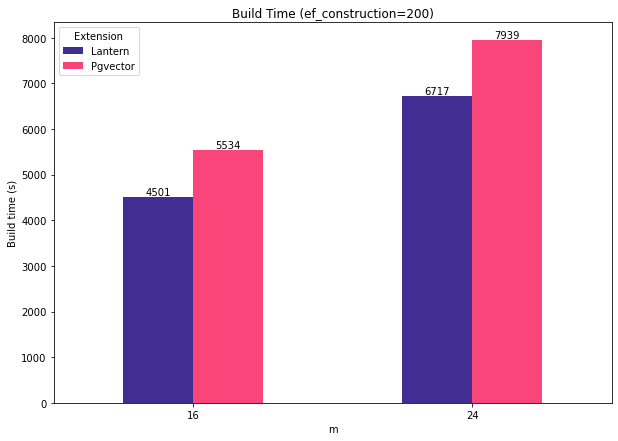

In [8]:
ax = pv.plot.bar(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Build time (s)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title(f"Build Time (ef_construction={ef_construction})")

In [9]:
prefix = '{:0>3}'.format(img_prefix + 1)
ax.get_figure().savefig(f"{img_dir}/{prefix}-{dataset}-build-time.png")

In [10]:
pv

Extension,Lantern,Pgvector
m,,
16,4501,5534
24,6717,7939


In [11]:
pv["speed_up"] = 1 + (pv["Pgvector"] - pv["Lantern"]) / pv["Lantern"]
pv

Extension,Lantern,Pgvector,speed_up
m,,,
16,4501,5534,1.229505
24,6717,7939,1.181926


## Massaging the results.csv file

I basically had to parse the `parameters` column to extract the construction/search parameters. With that, I could easily pivot the data frame for the different plots.

In [12]:
df_all_results = pd.read_csv(directory + "/results.csv")
df_all_results = df_all_results.rename(columns={'algorithm': 'Extension'})
df_all_results

,Extension,parameters,count,k-nn,epsilon,largeepsilon,rel,qps,p50,p95,p99,p999,distcomps,build,candidates,indexsize,queriessize,dataset
0,lantern,"Lantern(m=16, ef_construction=200, ef_search=200)",10,0.82691,0.88379,0.99851,0.089827,71.593262,14.148436,14.148436,14.148436,14.148436,0.0,5218.460759,10.0,1191712.0,16645.588847,glove-200-angular
1,lantern,"Lantern(m=24, ef_construction=200, ef_search=80)",10,0.78744,0.84838,0.99703,0.090109,75.808308,13.261709,13.261709,13.261709,13.261709,0.0,7486.911925,10.0,1360808.0,17950.644605,glove-200-angular
2,lantern,"Lantern(m=16, ef_construction=200, ef_search=40)",10,0.64228,0.70181,0.96286,0.092031,211.315484,4.960385,4.960385,4.960385,4.960385,0.0,5218.460759,10.0,1191712.0,5639.492095,glove-200-angular
3,lantern,"Lantern(m=24, ef_construction=200, ef_search=20)",10,0.60592,0.66615,0.95563,0.092353,190.467011,5.538485,5.538485,5.538485,5.538485,0.0,7486.911925,10.0,1360808.0,7144.586298,glove-200-angular
4,lantern,"Lantern(m=24, ef_construction=200, ef_search=400)",10,0.90685,0.95553,0.99998,0.089263,21.551394,46.400711,46.400711,46.400711,46.400711,0.0,7486.911925,10.0,1360808.0,63142.457940,glove-200-angular
5,lantern,"Lantern(m=24, ef_construction=200, ef_search=40)",10,0.70677,0.76959,0.98692,0.090964,115.660554,8.662009,8.662009,8.662009,8.662009,0.0,7486.911925,10.0,1360808.0,11765.532444,glove-200-angular
6,lantern,"Lantern(m=16, ef_construction=200, ef_search=120)",10,0.77892,0.83869,0.99425,0.090269,104.711364,9.600246,9.600246,9.600246,9.600246,0.0,5218.460759,10.0,1191712.0,11380.923331,glove-200-angular
7,lantern,"Lantern(m=24, ef_construction=200, ef_search=200)",10,0.86442,0.91960,0.99983,0.089508,38.045145,26.284562,26.284562,26.284562,26.284562,0.0,7486.911925,10.0,1360808.0,35768.243695,glove-200-angular
8,lantern,"Lantern(m=24, ef_construction=200, ef_search=120)",10,0.82458,0.88324,0.99898,0.089795,56.917262,17.763117,17.763117,17.763117,17.763117,0.0,7486.911925,10.0,1360808.0,23908.529009,glove-200-angular
9,lantern,"Lantern(m=24, ef_construction=200, ef_search=10)",10,0.48434,0.53571,0.87965,0.094707,264.234030,3.784524,3.784524,3.784524,3.784524,0.0,7486.911925,10.0,1360808.0,5150.010389,glove-200-angular


In [13]:
c = re.compile(".*m=(\d+)")
df_all_results['m'] =  [int(c.match(x).group(1)) for x in df_all_results['parameters']]

c = re.compile(".*ef_search=(\d+)")
df_all_results['ef_search'] =  [int(c.match(x).group(1)) for x in df_all_results['parameters']]

c = re.compile(".*ef_construction=(\d+)")
df_all_results['ef_construction'] =  [int(c.match(x).group(1)) for x in df_all_results['parameters']]

df_all_results.head()

,Extension,parameters,count,k-nn,epsilon,largeepsilon,rel,qps,p50,p95,...,p999,distcomps,build,candidates,indexsize,queriessize,dataset,m,ef_search,ef_construction
0,lantern,"Lantern(m=16, ef_construction=200, ef_search=200)",10,0.82691,0.88379,0.99851,0.089827,71.593262,14.148436,14.148436,...,14.148436,0.0,5218.460759,10.0,1191712.0,16645.588847,glove-200-angular,16,200,200
1,lantern,"Lantern(m=24, ef_construction=200, ef_search=80)",10,0.78744,0.84838,0.99703,0.090109,75.808308,13.261709,13.261709,...,13.261709,0.0,7486.911925,10.0,1360808.0,17950.644605,glove-200-angular,24,80,200
2,lantern,"Lantern(m=16, ef_construction=200, ef_search=40)",10,0.64228,0.70181,0.96286,0.092031,211.315484,4.960385,4.960385,...,4.960385,0.0,5218.460759,10.0,1191712.0,5639.492095,glove-200-angular,16,40,200
3,lantern,"Lantern(m=24, ef_construction=200, ef_search=20)",10,0.60592,0.66615,0.95563,0.092353,190.467011,5.538485,5.538485,...,5.538485,0.0,7486.911925,10.0,1360808.0,7144.586298,glove-200-angular,24,20,200
4,lantern,"Lantern(m=24, ef_construction=200, ef_search=400)",10,0.90685,0.95553,0.99998,0.089263,21.551394,46.400711,46.400711,...,46.400711,0.0,7486.911925,10.0,1360808.0,63142.457940,glove-200-angular,24,400,200


## Index Size

In [14]:
results_piv = df_all_results[df_all_results["ef_search"]==10].pivot(index="m", columns="Extension", values="indexsize")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})

results_piv

Extension,Lantern,Pgvector
m,,
16,1191712.0,1352608.0
24,1360808.0,1578032.0


Text(0.5, 1.0, 'Index Size (ef_construction=200)')

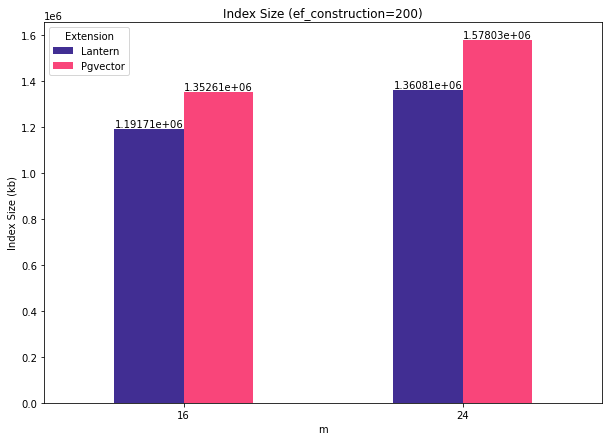

In [15]:
ax = results_piv.plot.bar(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Index Size (kb)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title(f"Index Size (ef_construction={ef_construction})")

In [16]:
prefix = '{:0>3}'.format(img_prefix + 2)
ax.get_figure().savefig(f"{img_dir}/{prefix}-{dataset}-index-size.png")

In [17]:
results_piv["speed_up"] = (results_piv["Pgvector"] - results_piv["Lantern"])/results_piv["Lantern"]
results_piv

Extension,Lantern,Pgvector,speed_up
m,,,
16,1191712.0,1352608.0,0.135012
24,1360808.0,1578032.0,0.159629


In [18]:
df_all_results.head()

,Extension,parameters,count,k-nn,epsilon,largeepsilon,rel,qps,p50,p95,...,p999,distcomps,build,candidates,indexsize,queriessize,dataset,m,ef_search,ef_construction
0,lantern,"Lantern(m=16, ef_construction=200, ef_search=200)",10,0.82691,0.88379,0.99851,0.089827,71.593262,14.148436,14.148436,...,14.148436,0.0,5218.460759,10.0,1191712.0,16645.588847,glove-200-angular,16,200,200
1,lantern,"Lantern(m=24, ef_construction=200, ef_search=80)",10,0.78744,0.84838,0.99703,0.090109,75.808308,13.261709,13.261709,...,13.261709,0.0,7486.911925,10.0,1360808.0,17950.644605,glove-200-angular,24,80,200
2,lantern,"Lantern(m=16, ef_construction=200, ef_search=40)",10,0.64228,0.70181,0.96286,0.092031,211.315484,4.960385,4.960385,...,4.960385,0.0,5218.460759,10.0,1191712.0,5639.492095,glove-200-angular,16,40,200
3,lantern,"Lantern(m=24, ef_construction=200, ef_search=20)",10,0.60592,0.66615,0.95563,0.092353,190.467011,5.538485,5.538485,...,5.538485,0.0,7486.911925,10.0,1360808.0,7144.586298,glove-200-angular,24,20,200
4,lantern,"Lantern(m=24, ef_construction=200, ef_search=400)",10,0.90685,0.95553,0.99998,0.089263,21.551394,46.400711,46.400711,...,46.400711,0.0,7486.911925,10.0,1360808.0,63142.457940,glove-200-angular,24,400,200


## Recall using m=16

In [19]:
m=16

In [20]:
results_piv = df_all_results[df_all_results["m"] == m].pivot(index="ef_search", columns="Extension", values="k-nn")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})
results_piv

Extension,Lantern,Pgvector
ef_search,,
10,0.40618,0.44549
20,0.52979,0.56392
40,0.64228,0.66724
80,0.73515,0.75285
120,0.77892,0.79611
200,0.82691,0.84293
400,0.87682,0.88894
800,NaN,0.92369


Text(0.5, 1.0, 'Recall (ef_construction=200, m=16)')

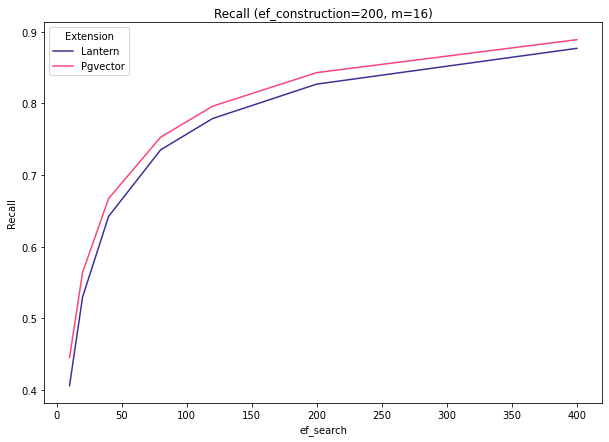

In [21]:
ax = results_piv[:-1].plot(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Recall")
ax.set_title(f"Recall (ef_construction={ef_construction}, m={m})")

In [22]:
prefix = '{:0>3}'.format(img_prefix + 3)
ax.get_figure().savefig(f"{img_dir}/{prefix}-{dataset}-recall-m16.png")

## Throughput using m=16

In [23]:
results_piv = df_all_results[df_all_results["m"] == m].pivot(index="ef_search", columns="Extension", values="qps")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})
results_piv

Extension,Lantern,Pgvector
ef_search,,
10,397.510514,879.443107
20,303.780917,612.151515
40,211.315484,408.279865
80,138.309093,238.666728
120,104.711364,149.763910
200,71.593262,97.519056
400,40.453761,64.836567
800,NaN,33.321666


Text(0.5, 1.0, 'QPS (ef_construction=200, m=16)')

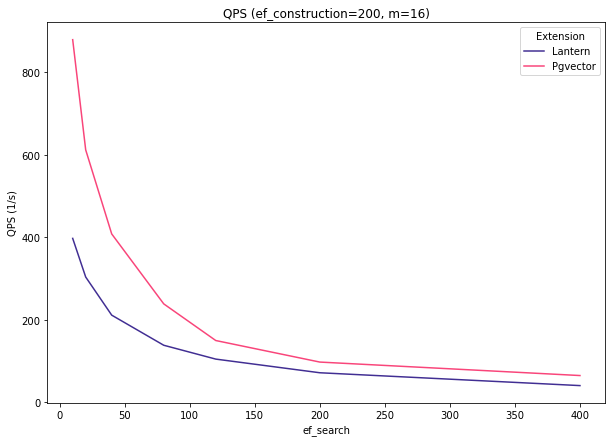

In [24]:
ax = results_piv[:-1].plot(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("QPS (1/s)")
ax.set_title(f"QPS (ef_construction={ef_construction}, m={m})")

In [25]:
prefix = '{:0>3}'.format(img_prefix + 4)
ax.get_figure().savefig(f"{img_dir}/{prefix}-{dataset}-qps-m16.png")

In [26]:
results_piv["speed_up"] = (results_piv["Pgvector"] - results_piv["Lantern"])/results_piv["Lantern"]
results_piv

Extension,Lantern,Pgvector,speed_up
ef_search,,,
10,397.510514,879.443107,1.212377
20,303.780917,612.151515,1.015109
40,211.315484,408.279865,0.932087
80,138.309093,238.666728,0.725604
120,104.711364,149.763910,0.430255
200,71.593262,97.519056,0.362126
400,40.453761,64.836567,0.602733
800,NaN,33.321666,NaN


## Latency (95th Percentile) using m = 16

In [27]:
results_piv = df_all_results[df_all_results["m"] == m].pivot(index="ef_search", columns="Extension", values="p95")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})
results_piv

Extension,Lantern,Pgvector
ef_search,,
10,2.554030,1.166962
20,3.565378,1.660495
40,4.960385,2.948301
80,7.230183,7.134588
120,9.600246,7.698449
200,14.148436,10.254406
400,25.539631,16.209649
800,NaN,30.230429


Text(0.5, 1.0, 'Latency (95th percentile) (ef_construction=200, m=16)')

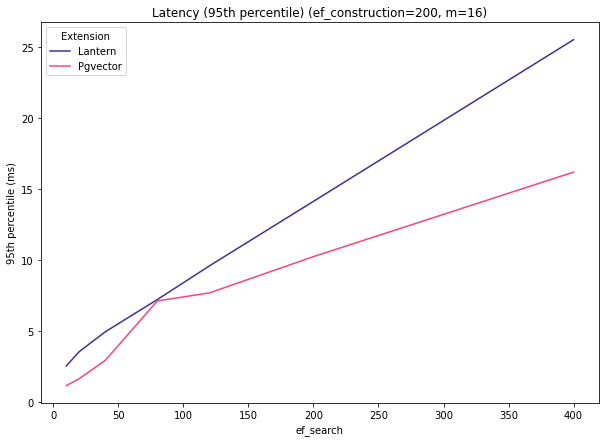

In [28]:
ax = results_piv[:-1].plot(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("95th percentile (ms)")
ax.set_title(f"Latency (95th percentile) (ef_construction={ef_construction}, m={m})")

In [29]:
prefix = '{:0>3}'.format(img_prefix + 5)
ax.get_figure().savefig(f"{img_dir}/{prefix}-{dataset}-latency-m16.png")

In [30]:
results_piv["speed_up"] = (results_piv["Pgvector"] - results_piv["Lantern"])/results_piv["Lantern"]
results_piv

Extension,Lantern,Pgvector,speed_up
ef_search,,,
10,2.554030,1.166962,-0.543090
20,3.565378,1.660495,-0.534272
40,4.960385,2.948301,-0.405631
80,7.230183,7.134588,-0.013222
120,9.600246,7.698449,-0.198099
200,14.148436,10.254406,-0.275227
400,25.539631,16.209649,-0.365314
800,NaN,30.230429,NaN


## Recall using m=24

In [31]:
m=24

In [32]:
results_piv = df_all_results[df_all_results["m"] == m].pivot(index="ef_search", columns="Extension", values="k-nn")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})
results_piv

Extension,Lantern,Pgvector
ef_search,,
10,0.48434,0.52092
20,0.60592,0.62967
40,0.70677,0.72796
80,0.78744,0.80580
120,0.82458,0.84251
200,0.86442,0.88068
400,0.90685,0.92135
800,NaN,0.95138


Text(0.5, 1.0, 'Recall (ef_construction=200, m=24)')

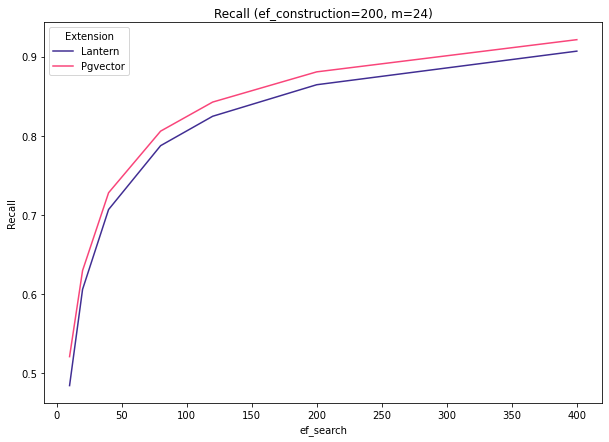

In [33]:
ax = results_piv[:-1].plot(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("Recall")
ax.set_title(f"Recall (ef_construction={ef_construction}, m={m})")

In [34]:
prefix = '{:0>3}'.format(img_prefix + 6)
ax.get_figure().savefig(f"{img_dir}/{prefix}-{dataset}-recall-m24.png")

## Throughput using m=24

In [35]:
results_piv = df_all_results[df_all_results["m"] == m].pivot(index="ef_search", columns="Extension", values="qps")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})
results_piv

Extension,Lantern,Pgvector
ef_search,,
10,264.234030,608.481448
20,190.467011,458.186474
40,115.660554,291.431297
80,75.808308,157.931398
120,56.917262,122.061696
200,38.045145,76.524088
400,21.551394,42.640113
800,NaN,22.771556


Text(0.5, 1.0, 'QPS (ef_construction=200, m=24)')

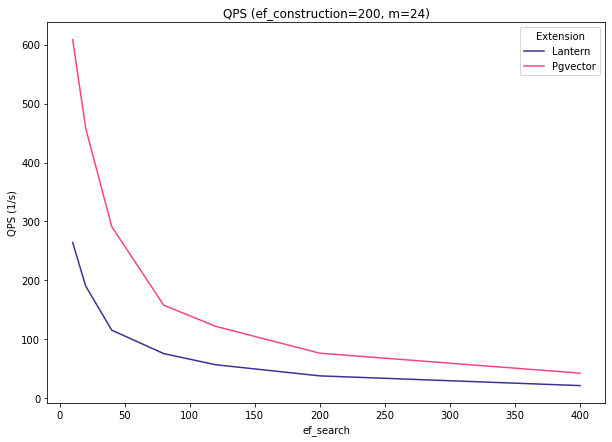

In [36]:
ax = results_piv[:-1].plot(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("QPS (1/s)")
ax.set_title(f"QPS (ef_construction={ef_construction}, m={m})")

In [37]:
prefix = '{:0>3}'.format(img_prefix + 7)
ax.get_figure().savefig(f"{img_dir}/{prefix}-{dataset}-qps-m24.png")

In [38]:
results_piv["speed_up"] = (results_piv["Pgvector"] - results_piv["Lantern"])/results_piv["Lantern"]
results_piv

Extension,Lantern,Pgvector,speed_up
ef_search,,,
10,264.234030,608.481448,1.302813
20,190.467011,458.186474,1.405595
40,115.660554,291.431297,1.519712
80,75.808308,157.931398,1.083299
120,56.917262,122.061696,1.144546
200,38.045145,76.524088,1.011402
400,21.551394,42.640113,0.978532
800,NaN,22.771556,NaN


## Latency (95th Percentile) using m = 24

In [39]:
results_piv = df_all_results[df_all_results["m"] == m].pivot(index="ef_search", columns="Extension", values="p95")
results_piv = results_piv.rename(columns={'lantern': 'Lantern', 'pgvector':'Pgvector'})
results_piv

Extension,Lantern,Pgvector
ef_search,,
10,3.784524,1.650983
20,5.538485,2.538851
40,8.662009,3.994446
80,13.261709,6.866092
120,17.763117,8.400121
200,26.284562,13.666578
400,46.400711,23.452096
800,NaN,44.356141


Text(0.5, 1.0, 'Latency (95th percentile) (ef_construction=200, m=24)')

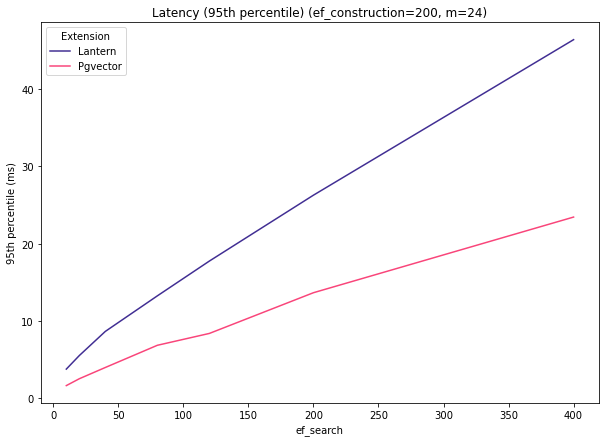

In [40]:
ax = results_piv[:-1].plot(color=colors, figsize=(10,7), rot=0)
ax.set_ylabel("95th percentile (ms)")
ax.set_title(f"Latency (95th percentile) (ef_construction={ef_construction}, m={m})")

In [41]:
prefix = '{:0>3}'.format(img_prefix + 8)
ax.get_figure().savefig(f"{img_dir}/{prefix}-{dataset}-latency-m24.png")

In [42]:
results_piv["speed_up"] = (results_piv["Pgvector"] - results_piv["Lantern"])/results_piv["Lantern"]
results_piv

Extension,Lantern,Pgvector,speed_up
ef_search,,,
10,3.784524,1.650983,-0.563754
20,5.538485,2.538851,-0.541598
40,8.662009,3.994446,-0.538855
80,13.261709,6.866092,-0.482262
120,17.763117,8.400121,-0.527103
200,26.284562,13.666578,-0.480053
400,46.400711,23.452096,-0.494575
800,NaN,44.356141,NaN
